In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

#### Using sklearn: The heights and weights example

We'll use a dataset of heights and weights of males and females to hone our understanding of classifiers. We load the data into a dataframe and plot it.


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/cs109/2015lab5/master/data/01_heights_weights_genders.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


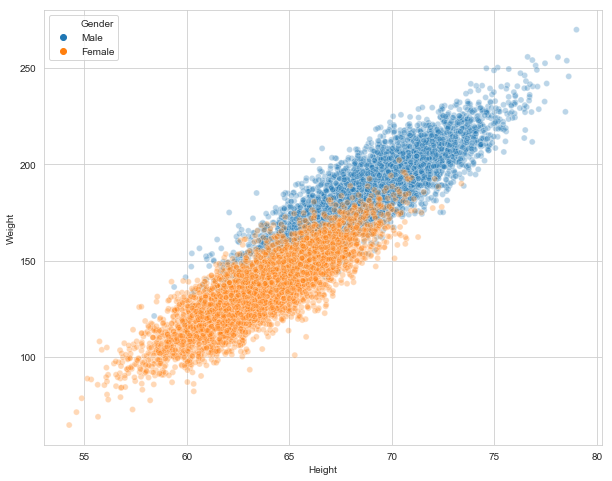

In [3]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = "Height",
               y = "Weight",
               hue = "Gender",
               data = df,
               alpha = 0.3);

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['Height', 'Weight']].values
y = df['Gender'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)

(6700, 2)
(3300, 2)
(6700,)
(3300, 2)


In [6]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\DD\Miniconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
pred = clf.predict(X_test)
print(pred)

['Male' 'Male' 'Male' ... 'Female' 'Female' 'Female']


In [8]:
accuracy_score = clf.score(X_test, y_test)
print(f"Our model's accuracy score is {accuracy_score}")

Our model's accuracy score is 0.9206060606060606


In [9]:
pred_df = pd.DataFrame({'true_value':y_test,
             'predicted_value':pred})

Lets look at the DataFrame

In [10]:
pred_df.head()

,true_value,predicted_value
0,Female,Male
1,Male,Male
2,Male,Male
3,Male,Male
4,Male,Male


We can check how many predictions we got correct

In [11]:
correct_pred = sum(pred_df['true_value'] == pred_df['predicted_value'])
print(f"We have correctly predicted {correct_pred} values out of {y_test.shape[0]} giving us a score of {np.round(correct_pred / y_test.shape[0], 2) * 100}%")

We have correctly predicted 3038 values out of 3300 giving us a score of 92.0%


####  The ATM Camera example

Imagine that you are tasked whith making a smart ATM camera which can distinguish between dollar notes and checks. You want to make sure that dollars are not classified as checks, and that checks are not classified as dollars.

You are given a set of 87 images of checks and dollars, each of which have been scaled to 322 X 137 pixels, and where each pixel has 3 color channels.

We will retrieve the data from Github.

The Below code will download the files.
Uncomment it if you would like to download it


In [12]:
from urllib.request import urlretrieve


# urlretrieve('https://github.com/cs109/2015lab5/blob/master/data/imag.pix.npy?raw=true', filename='imag_pix.npy')

# urlretrieve('https://github.com/cs109/2015lab5/blob/master/data/imag.lbl.npy?raw=true', filename = 'imag_lbl.npy')

Now lets load the files

In [13]:
data = np.load("imag_pix.npy")

In [14]:
# Labels
y = np.load("imag_lbl.npy")

In [15]:
STANDARD_SIZE = (322, 137)#standardized pixels in image.
data.shape, y.shape

((87, 132342), (87,))

The below code will convert the raw data into images.

In [16]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    return rgbArray

def display_image(mat):
    with sns.axes_style("white"):
        plt.imshow(get_image(mat))
        plt.xticks([])
        plt.yticks([])

Lets see a few images.

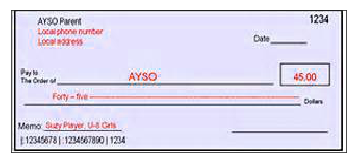

In [17]:
display_image(data[5])

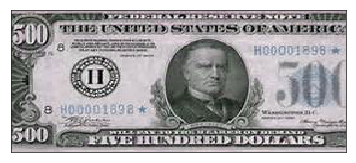

In [18]:
display_image(data[50])

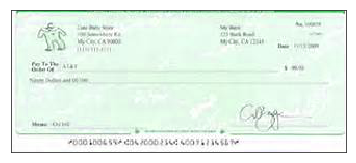

In [19]:
display_image(data[30])

Its easy for us to differenciate between the two. But lets see if the machine can do it.

Our data as has the 132342 features. That may be too many features. We will use Principal Component Analysis (PCA) to reduce the dimensions of our data. 

We'll reduce our dimensionality from 136452 to 60. We choose 60 as a large apriori number: we dont know if the variation in the data will have gone below a reasonable threshold by then. Notice that we use fit_transform in the sklearn API which takes the original 87 rows x 136452 columns dimensional data data and transforms it to a 87 x 90 data matrix X

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)

X = pca.fit_transform(data)

In [21]:
print(pca.explained_variance_ratio_.sum())

0.9425068829611646




The explained variance ratio pca.explained_variance_ratio_ tells us how much of the variation in the features is explained by these 60 features. When we sum it up over the features, we see that 94% is explained: good enough to go down to a 60 dimensional space from a 136452 dimensional one!


In [22]:
df_atm = pd.DataFrame({'y':y,
                      'label':np.where(y == 1,
                                      'check',
                                      'dollar')})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df_atm['pc%i' % (i + 1)] = X[:,i]
    

df_atm.head()

,y,label,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60
0,1,check,-22536.362571,-2428.343904,-2133.776668,-328.315702,-1065.236460,79.761368,-424.988465,622.502689,...,-527.979695,190.424199,413.182808,-99.048027,168.802309,-504.427903,250.248989,-364.345964,-369.729433,-80.247561
1,1,check,-22226.658684,-709.255300,-288.824272,-1300.628030,-792.078961,217.378619,1076.765638,-2115.080254,...,-467.881892,-114.237683,168.799306,441.647053,-470.291181,-470.568218,194.315186,138.156216,-80.872083,-203.585220
2,1,check,-17364.260784,-4252.026998,793.805597,-1362.065821,-374.237268,3142.093402,2514.190657,1443.861110,...,-2346.782414,-2071.318316,1304.643822,-720.389052,1610.607013,-2407.684718,-909.154235,7.789211,-1600.072607,874.679920
3,1,check,-22847.256200,-900.593510,577.204519,-180.303457,-733.139510,-107.701318,1442.014900,-1069.723567,...,92.473996,-17.105906,-21.993800,101.333330,528.153046,486.740694,488.784997,-1343.033627,244.462763,802.789782
4,1,check,-15868.672595,3259.490872,506.801477,-919.619940,2166.570661,-981.587690,-1669.693011,-391.226030,...,-1040.809069,-2199.653138,261.208632,3416.118885,-685.377523,2746.301784,-897.274943,-1068.195025,-2454.099027,-1756.028054


Lets see what these principal components look like:

In [23]:
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=322*137*3
    r=pc.components_[j][0:size:3]
    g=pc.components_[j][1:size:3]
    b=pc.components_[j][2:size:3]
    r=normit(r)
    g=normit(g)
    b=normit(b)
    return r,g,b
def display_component(pc, j):
    r,g,b = getNC(pc,j)
    rgbArray = np.zeros((137,322,3), 'uint8')
    rgbArray[..., 0] = r.reshape(137,322)
    rgbArray[..., 1] = g.reshape(137,322)
    rgbArray[..., 2] = b.reshape(137,322)
    plt.imshow(rgbArray)
    plt.xticks([])
    plt.yticks([])

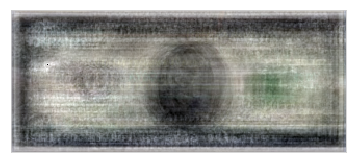

In [24]:
display_component(pca,0)

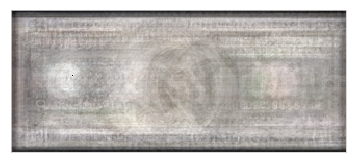

In [25]:
display_component(pca,1)

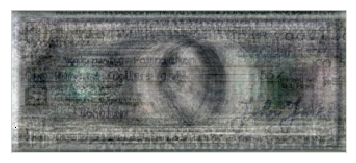

In [26]:
display_component(pca,7)

We take the first three principal components and immediately notice in the diagram above that they are enough to separate out the checks and the dollars. Indeed the first component itself seems to be mostly enough. We can look at the image of the first component and speculate that the medallion in the middle of the dollars probably contributes to this.

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Keeping the default 5 Neighbors
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
train_score = clf.score(X_train, y_train)
print(f"Our Training score is {train_score}")

Our Training score is 0.9615384615384616


In [30]:
test_score = clf.score(X_test, y_test)
print(f"Our Testing score is {test_score}")

Our Testing score is 0.9714285714285714


In [31]:
train_score = []
test_score = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state = 42)

for i in reversed(range(1,51)):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)    
    
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

In [32]:
train_test_df = pd.DataFrame({"train_score":train_score,
            "test_score":test_score})

In [33]:
knn_array = [i for i in reversed(range(1,51))]

train_test_df['knn'] = knn_array

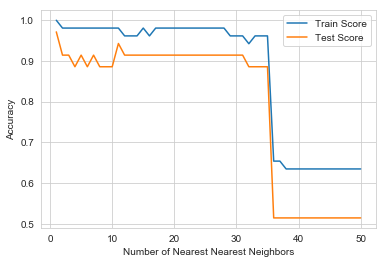

In [34]:
plt.plot(train_test_df['knn'],
         train_test_df['train_score'],
        label = 'Train Score')
plt.plot(train_test_df['knn'],
         train_test_df['test_score'],
        label = 'Test Score')
plt.xlabel("Number of Nearest Nearest Neighbors")
plt.ylabel('Accuracy')
plt.legend()